In [1]:
import sys
sys.path.append("..\\") # parent directory
from AQUA_general import AQUA
from batchAQUA_general import batchAQUA
from stimulus import *
from plotting_functions import *
from phase_response import *


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.interpolate import LSQUnivariateSpline

A perturbation of height 100 pA and duration 0.01 ms


  0%|          | 0/399999 [00:00<?, ?it/s]

100%|██████████| 399999/399999 [00:05<00:00, 76881.11it/s]


Number of spikes: 28
duration: 28378
t_i: 622.39
t_f: 693.335
Number of perturbations: 500
Reference spiking period is 70.95 ms (14.0 Hz)
N_sims: 1


100%|██████████| 28377/28377 [00:55<00:00, 508.44it/s]


622.39
[622.445 693.38 ]


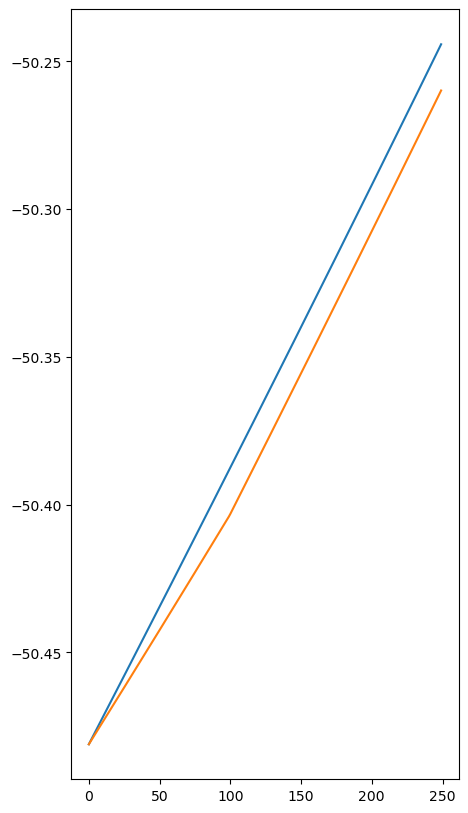

C:\Users\liamm\AppData\Local\Temp\ipykernel_42256\3790189768.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, phase_response(RS_E, I_h, T_pert, H_pert)], ignore_index = True)


In [2]:
RS = {'name': 'RS', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
    'a': 0.03, 'b': -2, 'c': -50, 'd': 100, 'e': 0.0, 'f': 0.0, 'tau': 0.0}

RS_E = {'name': 'RS', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
    'a': 0.03, 'b': -2, 'c': -50, 'd': 100, 'e': 0.03, 'f': 8.0, 'tau': 0.5}

FS = {'name': 'FS', 'C': 20, 'k': 1, 'v_r': -55, 'v_t': -40, 'v_peak': 25,
    'a': 0.2, 'b': -2, 'c': -45, 'd': 0, 'e': 0.0, 'f': 0.0, 'tau': 0.0}


T_pert = 0.01 #ms, duration of perturbation
H_pert = 100 # pA, amplitude of perturbation
#pert = 100*np.ones(10) 

I_heights = [100] #, 150, 200, 250, 300]

df = pd.DataFrame(data = [], columns = ["I_h", "Hz", "Perturbation time", "PRC"])


for I_h in I_heights:
    df = pd.concat([df, phase_response(RS_E, I_h, T_pert, H_pert)], ignore_index = True)


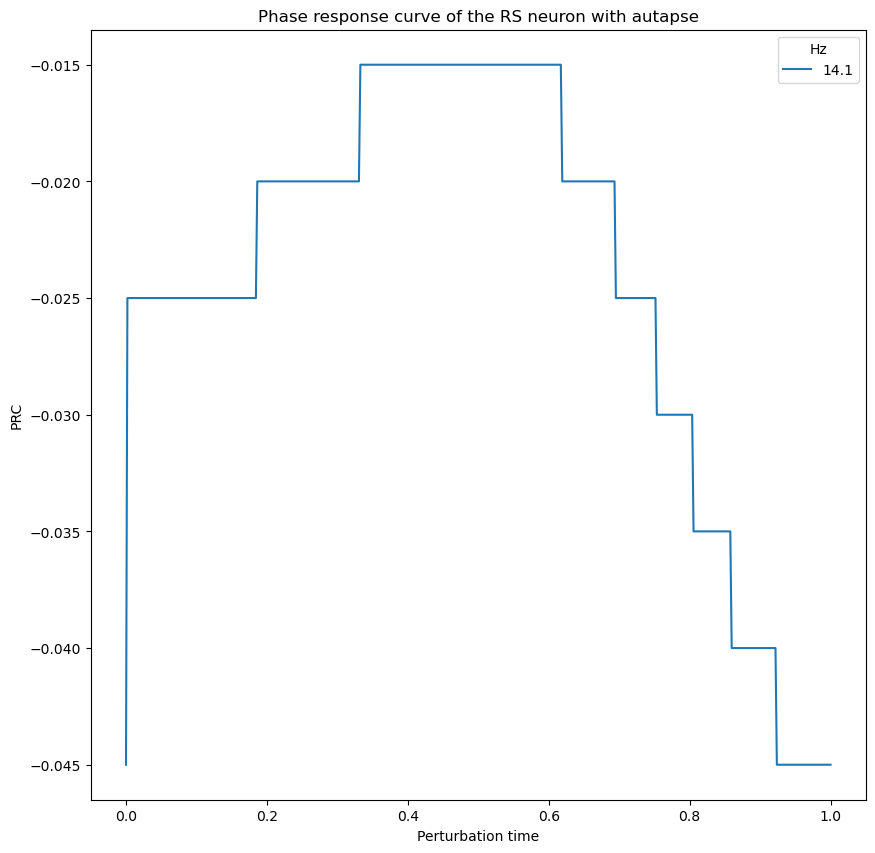

In [3]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.lineplot(data = df, x = "Perturbation time", y = "PRC", hue = "Hz", palette = 'tab10')
plt.title("Phase response curve of the RS neuron with autapse")
#plt.savefig(f"phase_responseRS_E_allHz_dt-0.001.png")

plt.show()